In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input
import numpy as np
import time
import matplotlib.pyplot as plt
from google.colab import files

print(tf.__version__)

2.18.0


In [2]:
# Define constants
NUMBER_OF_EPOCHS = 100
NUMBER_OF_TEST_IMAGES = 1000

In [3]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess the CIFAR-10 dataset
print("Loading and preprocessing CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Keep original labels for display
y_test_original = y_test.copy()

# Convert to categorical for training
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Create the model as specified - using Input layer first to avoid warning
print("Creating minimal CNN model...")
inputs = Input(shape=(32, 32, 3))

# Convert RGB to grayscale by taking the mean across channels
x = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(inputs)

# Minimal Conv layer
x = layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Second minimal Conv layer
x = layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Flatten and classify
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Create model
cnn = models.Model(inputs=inputs, outputs=outputs)

# Display model summary
cnn.summary()

# Compile the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(x_train, y_train_cat,
                  batch_size=64,
                  epochs=NUMBER_OF_EPOCHS,
                  validation_data=(x_test, y_test_cat),
                  verbose=1)

Loading and preprocessing CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Creating minimal CNN model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,466 (21.35 KB)

 Trainable params: 5,466 (21.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2527 - loss: 2.0708 - val_accuracy: 0.4104 - val_loss: 1.6953
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4232 - loss: 1.6594 - val_accuracy: 0.4590 - val_loss: 1.5482
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4659 - loss: 1.5342 - val_accuracy: 0.4802 - val_loss: 1.4819
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4900 - loss: 1.4701 - val_accuracy: 0.4926 - val_loss: 1.4428
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5056 - loss: 1.4272 - val_accuracy: 0.5025 - val_loss: 1.4130
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5189 - loss: 1.3935 - val_accuracy: 0.5117 - val_loss: 1.3848
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5287 - loss: 1.3656 - val_accuracy: 0.5212 - val_loss: 1.3602
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5374 - loss: 1.3416 - val_accu

In [4]:
# Save ONLY the weights instead of the full model
print("Saving model weights...")
cnn.save_weights('cifar10_cnn.weights.h5')

Saving model weights...


In [5]:
files.download('cifar10_cnn.weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

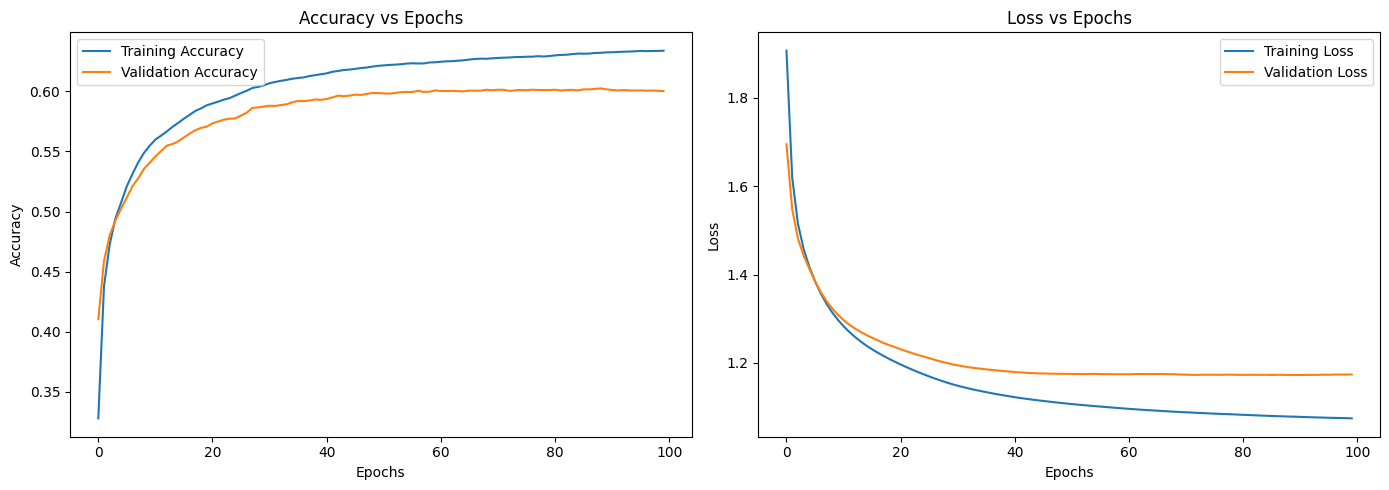

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.59      0.65      0.62      1000
  automobile       0.71      0.74      0.73      1000
        bird       0.43      0.46      0.44      1000
         cat       0.43      0.38      0.41      1000
        deer       0.58      0.53      0.55      1000
         dog       0.52      0.51      0.51      1000
        frog       0.70      0.67      0.68      1000
       horse       0.64      0.69      0.66      1000
        ship       0.65      0.70      0.67      1000
       truck       0.76      0.67      0.71      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



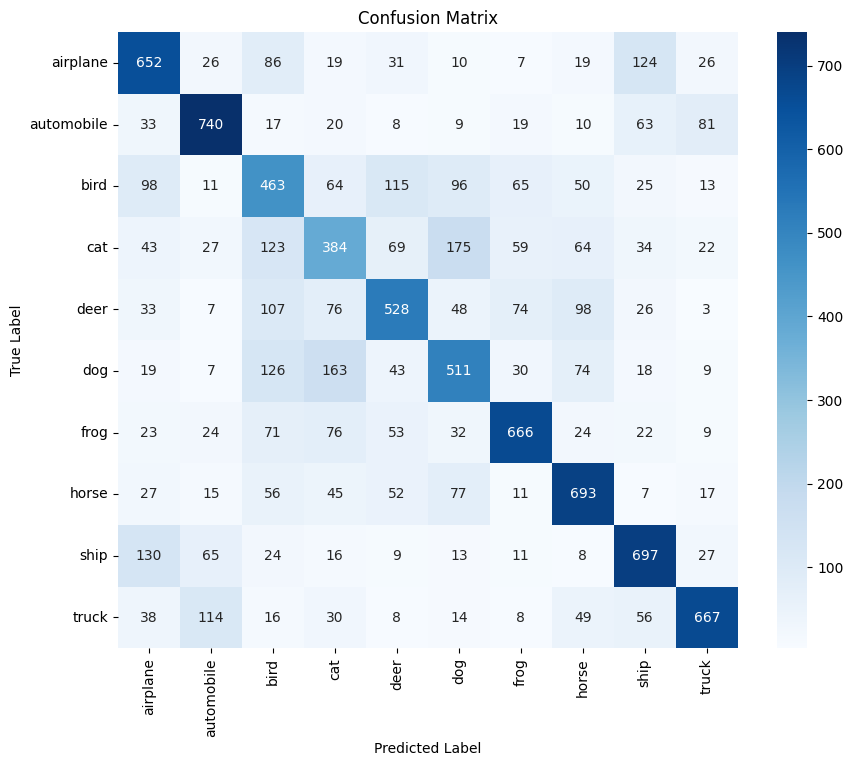


Model Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5962 - loss: 1.1737
Test Loss: 1.1736
Test Accuracy: 0.6001


In [6]:
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Plot training history
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
y_pred = cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Use original labels for evaluation (not one-hot encoded)
y_true = y_test.squeeze()  # Remove singleton dimensions

# Classification report
print("\nClassification Report:")
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate with one-hot encoded test data
print("\nModel Evaluation:")
evaluation = cnn.evaluate(x_test, y_test_cat)
print(f"Test Loss: {evaluation[0]:.4f}")
print(f"Test Accuracy: {evaluation[1]:.4f}")

In [7]:
# Generate C code with parameters
def np_to_c_array(arr, indent=0, precision=8):
    indent_str = " " * indent

    if arr.ndim == 1:
        # For 1D arrays (biases)
        c_arr = "{"
        for i in range(arr.shape[0]):
            if i % 4 == 0 and i > 0:  # Format with 4 values per line
                c_arr += "\n" + indent_str + " "
            c_arr += f"{arr[i]:.{precision}f}f"
            if i < arr.shape[0] - 1:
                c_arr += ", "
        c_arr += "}"
        return c_arr

    elif arr.ndim == 4:
        # For 4D arrays (conv weights) - Reshape to [filters][channels][height][width]
        arr = np.transpose(arr, (3, 2, 0, 1))
        c_arr = "{"

        for f in range(arr.shape[0]):
            if f > 0:
                c_arr += ",\n" + indent_str + " "
            c_arr += "{ "

            for c in range(arr.shape[1]):
                if c > 0:
                    c_arr += ",\n" + indent_str + "  "
                c_arr += "{"

                for h in range(arr.shape[2]):
                    if h > 0:
                        c_arr += ",\n" + indent_str + "   "
                    c_arr += "{"

                    for w in range(arr.shape[3]):
                        c_arr += f"{arr[f, c, h, w]:.{precision}f}f"
                        if w < arr.shape[3] - 1:
                            c_arr += ", "

                    c_arr += "}"
                c_arr += "}"
            c_arr += "}"
        c_arr += "}"
        return c_arr

    elif arr.ndim == 2:
        # For 2D arrays (dense weights)
        c_arr = "{"
        for i in range(arr.shape[0]):
            if i > 0:
                c_arr += ",\n" + indent_str + " "
            c_arr += "{"
            for j in range(arr.shape[1]):
                if j % 10 == 0 and j > 0:  # Break into multiple lines for readability
                    c_arr += "\n" + indent_str + "  "
                c_arr += f"{arr[i, j]:.{precision}f}f"
                if j < arr.shape[1] - 1:
                    c_arr += ", "
            c_arr += "}"
        c_arr += "}"
        return c_arr

    else:
        return str(arr)

def generate_cnn_params_h(model):
    c_code = []
    c_code.append("/* CNN Parameter Values - Generated by TensorFlow */")
    c_code.append("#ifndef CNN_PARAMS_H")
    c_code.append("#define CNN_PARAMS_H")
    c_code.append("")

    # Track layer indices
    conv_idx = 0
    pool_idx = 0

    # Extract parameters from each layer
    for i, layer in enumerate(model.layers):
        layer_name = layer.__class__.__name__

        if layer_name == 'Lambda':
            c_code.append(f"/* Layer {i}: Lambda (RGB to Grayscale) - No parameters */")
            c_code.append("")

        elif layer_name == 'Conv2D':
            weights, biases = layer.get_weights()

            # Layer dimensions
            out_channels = weights.shape[3]  # Number of filters
            in_channels = weights.shape[2]   # Input channels
            kernel_h = weights.shape[0]      # Kernel height
            kernel_w = weights.shape[1]      # Kernel width

            c_code.append(f"/* Layer {i}: Conv2D */")
            c_code.append(f"#define CONV{conv_idx}_OUT_CHANNELS {out_channels}")
            c_code.append(f"#define CONV{conv_idx}_IN_CHANNELS {in_channels}")
            c_code.append(f"#define CONV{conv_idx}_KERNEL_SIZE {kernel_h}")
            c_code.append("")

            # Weights
            c_code.append(f"/* Conv{conv_idx} weights [filters][channels][height][width] */")
            c_code.append(f"static const float conv{conv_idx}_weights[CONV{conv_idx}_OUT_CHANNELS][CONV{conv_idx}_IN_CHANNELS][CONV{conv_idx}_KERNEL_SIZE][CONV{conv_idx}_KERNEL_SIZE] = {np_to_c_array(weights, indent=0)};")
            c_code.append("")

            # Biases
            c_code.append(f"/* Conv{conv_idx} biases [filters] */")
            c_code.append(f"static const float conv{conv_idx}_biases[CONV{conv_idx}_OUT_CHANNELS] = {np_to_c_array(biases, indent=0)};")
            c_code.append("")

            conv_idx += 1

        elif layer_name == 'MaxPooling2D':
            pool_size = layer.get_config()['pool_size']
            # Define the pool size with the expected index naming (POOL1_SIZE, POOL3_SIZE, etc.)
            # The C file expects pool indices to be odd numbers (1, 3, etc.)
            pool_idx_in_c = pool_idx * 2 + 1

            c_code.append(f"/* Layer {i}: MaxPooling2D - Pool size: {pool_size} */")
            c_code.append(f"#define POOL{pool_idx_in_c}_SIZE {pool_size[0]}")
            c_code.append("")

            pool_idx += 1

        elif layer_name == 'Flatten':
            c_code.append(f"/* Layer {i}: Flatten - No parameters */")
            c_code.append("")

        elif layer_name == 'Dense':
            weights, biases = layer.get_weights()

            # Layer dimensions
            input_size = weights.shape[0]
            output_size = weights.shape[1]

            c_code.append(f"/* Layer {i}: Dense */")
            c_code.append(f"#define DENSE_INPUT_SIZE {input_size}")
            c_code.append(f"#define DENSE_OUTPUT_SIZE {output_size}")
            c_code.append("")

            # Weights
            c_code.append("/* Dense weights [input_size][output_size] */")
            c_code.append(f"static const float dense_weights[DENSE_INPUT_SIZE][DENSE_OUTPUT_SIZE] = {np_to_c_array(weights, indent=0)};")
            c_code.append("")

            # Biases
            c_code.append("/* Dense biases [output_size] */")
            c_code.append(f"static const float dense_biases[DENSE_OUTPUT_SIZE] = {np_to_c_array(biases, indent=0)};")
            c_code.append("")

    # Add function prototype for the classifier function
    c_code.append("/* Function prototype for CIFAR-10 classifier */")
    c_code.append("uint32_t cifar10_classify(uint8_t image[32][32][3], volatile float *confidence);")
    c_code.append("")

    # Close the header guard
    c_code.append("#endif /* CNN_PARAMS_H */")

    return c_code

# After training the model, generate and save the C header file
c_code = generate_cnn_params_h(cnn)

# Write to file
with open('cnn_params.h', 'w') as f:
    f.write('\n'.join(c_code))

print("Generated C header file 'cnn_params.h' with parameter values")
print("\nPreview of generated C code:")
print("============================")
for line in c_code[:30]:  # Print first 30 lines as preview
    print(line)
print("...")
print(f"Total lines of C code: {len(c_code)}")

# Download the file
files.download('cnn_params.h')

Generated C header file 'cnn_params.h' with parameter values

Preview of generated C code:
/* CNN Parameter Values - Generated by TensorFlow */
#ifndef CNN_PARAMS_H
#define CNN_PARAMS_H

/* Layer 1: Lambda (RGB to Grayscale) - No parameters */

/* Layer 2: Conv2D */
#define CONV0_OUT_CHANNELS 4
#define CONV0_IN_CHANNELS 1
#define CONV0_KERNEL_SIZE 3

/* Conv0 weights [filters][channels][height][width] */
static const float conv0_weights[CONV0_OUT_CHANNELS][CONV0_IN_CHANNELS][CONV0_KERNEL_SIZE][CONV0_KERNEL_SIZE] = {{ {{0.39847153f, -0.06765147f, 0.67237240f},
   {-0.36480862f, -0.48908696f, -0.35286552f},
   {0.19730532f, -0.19087808f, 0.20601946f}}},
 { {{0.19384567f, -0.53679991f, 0.35406369f},
   {0.47763222f, -0.80741549f, 0.28771031f},
   {0.42625991f, -0.47687674f, 0.04871407f}}},
 { {{-0.59219545f, -0.14971574f, 0.71704626f},
   {0.32942373f, -0.40629080f, -0.04640383f},
   {0.25299779f, 0.36387780f, -0.52115595f}}},
 { {{-0.33746460f, 0.06875765f, 0.50780171f},
   {-0.07009495f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>